<a href="https://colab.research.google.com/github/ToriStoner/ToriStoner/blob/main/API_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#create python code that takes a user input for a stock

import json
import pandas as pd
import requests


In [2]:
stock=input()

MSFT


In [3]:
print("The Stock we will research is:" + stock)

The Stock we will research is:MSFT


In [4]:
apikey="apikey"

url = f'https://yfapi.net/v8/finance/chart/{stock}?comparisons=MSFT%2C%5EVIX&range=1mo&region=US&interval=1d&lang=en&events=div%2Csplit'

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

print(response.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"MSFT","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":511108200,"regularMarketTime":1728059906,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":418.465,"fiftyTwoWeekHigh":419.75,"fiftyTwoWeekLow":414.97,"regularMarketDayHigh":419.75,"regularMarketDayLow":414.97,"regularMarketVolume":6249463,"longName":"Microsoft Corporation","shortName":"Microsoft Corporation","chartPreviousClose":408.9,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","end":1728048600,"start":1728028800,"gmtoffset":-14400},"regular":{"timezone":"EDT","end":1728072000,"start":1728048600,"gmtoffset":-14400},"post":{"timezone":"EDT","end":1728086400,"start":1728072000,"gmtoffset":-14400}},"dataGranularity":"1d","range":"1mo","validRanges":["10y","ytd","1d","max","3mo","5d","1mo","2y","1y","6mo","5y"]},"timestamp":[1725456600,1725543

In [5]:
#ticker name, full name of stock, current market price
#target mean price, 52 week high and low
#5 of the current trending stock

stock_json = response.json()

api_one = print(stock_json['chart']['result'][0]['comparisons'][0]['symbol'] + " Long Name: " + stock_json['chart']['result'][0]['meta']["longName"] + " Current Market Price: " +
      str(stock_json['chart']['result'][0]['meta']['regularMarketPrice']) + " 52 Week High: " + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekHigh']) + " 52 Week Low: " + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekLow']))

^VIX Long Name: Microsoft Corporation Current Market Price: 418.465 52 Week High: 419.75 52 Week Low: 414.97


In [6]:
apikey="apikey"

url = f'https://yfapi.net/v11/finance/quoteSummary/{stock}?lang=en&region=US&modules=financialData'


querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

second = requests.request("GET", url, headers=headers, params=querystring)

print(second.text)

{"quoteSummary":{"result":[{"financialData":{"maxAge":86400,"currentPrice":{"raw":418.47,"fmt":"418.47"},"targetHighPrice":{"raw":600.0,"fmt":"600.00"},"targetLowPrice":{"raw":440.0,"fmt":"440.00"},"targetMeanPrice":{"raw":496.38,"fmt":"496.38"},"targetMedianPrice":{"raw":500.0,"fmt":"500.00"},"recommendationMean":{"raw":1.7,"fmt":"1.70"},"recommendationKey":"buy","numberOfAnalystOpinions":{"raw":47,"fmt":"47","longFmt":"47"},"totalCash":{"raw":75531001856,"fmt":"75.53B","longFmt":"75,531,001,856"},"totalCashPerShare":{"raw":10.162,"fmt":"10.16"},"ebitda":{"raw":129433001984,"fmt":"129.43B","longFmt":"129,433,001,984"},"totalDebt":{"raw":97851998208,"fmt":"97.85B","longFmt":"97,851,998,208"},"quickRatio":{"raw":1.141,"fmt":"1.14"},"currentRatio":{"raw":1.275,"fmt":"1.27"},"totalRevenue":{"raw":245122007040,"fmt":"245.12B","longFmt":"245,122,007,040"},"debtToEquity":{"raw":36.447,"fmt":"36.45%"},"revenuePerShare":{"raw":32.986,"fmt":"32.99"},"returnOnAssets":{"raw":0.14802,"fmt":"14.80%

In [7]:
target_json = second.json()

api_two = print(target_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice'])


{'raw': 496.38, 'fmt': '496.38'}


In [8]:
apikey="apikey"

url = 'https://yfapi.net/v1/finance/trending/US'


querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

third = requests.request("GET", url, headers=headers, params=querystring)

print(third.text)

{"finance":{"result":[{"count":20,"quotes":[{"symbol":"SAVE"},{"symbol":"RIVN"},{"symbol":"JBLU"},{"symbol":"BENF"},{"symbol":"ZIM"},{"symbol":"PEV"},{"symbol":"LAZR"},{"symbol":"AAL"},{"symbol":"SLV"},{"symbol":"ANF"},{"symbol":"CDE"},{"symbol":"FORD"},{"symbol":"ALTM"},{"symbol":"VFC"},{"symbol":"EH"},{"symbol":"ACMR"},{"symbol":"PYPL"},{"symbol":"GEV"},{"symbol":"UBI.PA"},{"symbol":"SNOW"}],"jobTimestamp":1728059542022,"startInterval":202410041500}],"error":null}}


In [9]:
trending_json = third.json()


In [10]:
api_three = []
for i in trending_json['finance']['result'][0]['quotes'][:5]:
  for value in i.values():
    api_three.append(value)

print(api_three)



['SAVE', 'RIVN', 'JBLU', 'BENF', 'ZIM']


In [11]:
#putting the outputs in one df

api_one = stock_json['chart']['result'][0]['comparisons'][0]['symbol'] +  stock_json['chart']['result'][0]['meta']["longName"] + str(stock_json['chart']['result'][0]['meta']['regularMarketPrice']) +  str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekHigh']) + str(stock_json['chart']['result'][0]['meta']['fiftyTwoWeekLow'])

api_two = target_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']

api_three = api_three


In [12]:
df = pd.DataFrame({'api_one': [api_one], 'api_two': [api_two], 'api_three': [api_three]})


In [13]:
print(df)

                                        api_one  \
0  ^VIXMicrosoft Corporation418.465419.75414.97   

                            api_two                      api_three  
0  {'raw': 496.38, 'fmt': '496.38'}  [SAVE, RIVN, JBLU, BENF, ZIM]  


In [14]:
#output to csv

df.to_csv('output.csv')

In [15]:
#plot the highest value of a stock at each of the last 5 days?'


apikey="apikey"

url = 'https://yfapi.net/v8/finance/chart/AAPL?comparisons=MSFT%2C%5EVIX&range=5d&region=US&interval=1d&lang=en&events=div%2Csplit'

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

five_days = requests.request("GET", url, headers=headers, params=querystring)

print(five_days.text)


{"chart":{"result":[{"meta":{"currency":"USD","symbol":"AAPL","exchangeName":"NMS","fullExchangeName":"NasdaqGS","instrumentType":"EQUITY","firstTradeDate":345479400,"regularMarketTime":1728059908,"hasPrePostMarketData":true,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":225.21,"fiftyTwoWeekHigh":228.0,"fiftyTwoWeekLow":224.14,"regularMarketDayHigh":228.0,"regularMarketDayLow":224.14,"regularMarketVolume":15938800,"longName":"Apple Inc.","shortName":"Apple Inc.","chartPreviousClose":227.79,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","start":1728028800,"end":1728048600,"gmtoffset":-14400},"regular":{"timezone":"EDT","start":1728048600,"end":1728072000,"gmtoffset":-14400},"post":{"timezone":"EDT","start":1728072000,"end":1728086400,"gmtoffset":-14400}},"dataGranularity":"1d","range":"5d","validRanges":["5d","3mo","max","6mo","10y","ytd","1mo","1y","2y","1d","5y"]},"timestamp":[1727703000,1727789400,1727875800,172796220

In [16]:
five_days = five_days.json()

In [17]:
fiveday_values = five_days['chart']['result'][0]['comparisons'][0]['high'][:5]

In [18]:
print(fiveday_values)

[430.42, 428.48, 422.82, 419.55, 419.75]


In [19]:
days = [1, 2, 3, 4, 5]

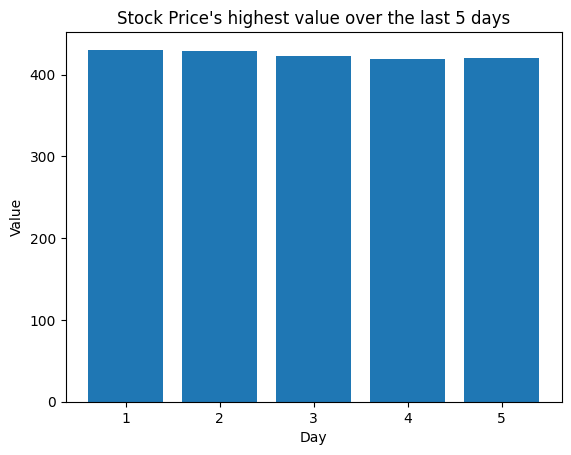

In [20]:
import matplotlib.pyplot as plt

plt.bar(days, fiveday_values)
plt.title("Stock Price's highest value over the last 5 days")
plt.xlabel("Day")
plt.ylabel("Value")
plt.show()

